# <center>Simple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use `scikit-learn` to implement simple linear regression using dataset that is related to Fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate your model using test set, and finally use model to predict unknown value.

**`FuelConsumptionCo2.csv`** contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

#### Practice

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
# import sklearn.datasets import

[Link](https://medium.com/@powusu381/multiple-regression-in-python-using-scikit-learn-predicting-the-miles-per-gallon-mpg-of-cars-4c8e512234be)

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('FuelConsumptionCo2.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [11]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [17]:
#Sanity check

Check sanity check: https://stackoverflow.com/questions/4055733/what-is-a-sanity-test-check

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [26]:
df.memory_usage().sum()

111096

In [27]:
df.memory_usage()

Index                        128
MODELYEAR                   8536
MAKE                        8536
MODEL                       8536
VEHICLECLASS                8536
ENGINESIZE                  8536
CYLINDERS                   8536
TRANSMISSION                8536
FUELTYPE                    8536
FUELCONSUMPTION_CITY        8536
FUELCONSUMPTION_HWY         8536
FUELCONSUMPTION_COMB        8536
FUELCONSUMPTION_COMB_MPG    8536
CO2EMISSIONS                8536
dtype: int64

In [31]:
sns.boxplot(data=df)

<AxesSubplot:>

In [30]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [32]:
df.MODEL.describe()

count         1067
unique         663
top       F150 FFV
freq             8
Name: MODEL, dtype: object

In [33]:
df.MODEL.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', 'RDX AWD', 'RLX', 'TL', 'TL AWD',
       'TSX', 'DB9', 'RAPIDE', 'V8 VANTAGE', 'V8 VANTAGE S', 'VANQUISH',
       'A4', 'A4 QUATTRO', 'A5 CABRIOLET QUATTRO', 'A5 QUATTRO',
       'A6 QUATTRO', 'A6 QUATTRO TDI CLEAN DIESEL', 'A7 QUATTRO',
       'A7 QUATTRO TDI CLEAN DIESEL', 'A8', 'A8 TDI CLEAN DIESEL', 'A8L',
       'A8L TDI CLEAN DIESEL', 'ALLROAD QUATTRO', 'Q5', 'Q5 HYBRID',
       'Q5 TDI CLEAN DIESEL', 'Q7', 'Q7 TDI CLEAN DIESEL', 'R8',
       'R8 SPYDER', 'RS5', 'RS5 CABRIOLET', 'RS7', 'S4', 'S5',
       'S5 CABRIOLET', 'S6', 'S7', 'S8', 'SQ5', 'TT COUPE QUATTRO',
       'TT ROADSTER QUATTRO', 'TTS COUPE QUATTRO', 'TTS ROADSTER QUATTRO',
       'CONTINENTAL GT', 'CONTINENTAL GT CONVERTIBLE',
       'CONTINENTAL GT SPEED CONVERTIBLE', 'CONTINENTAL GTC',
       'FLYING SPUR', 'MULSANNE', '320i', '320i xDRIVE', '328d xDRIVE',
       '328d xDRIVE TOURING', '328i', '328i xDRIVE',
       '328i xDRIVE GRAN TURISMO', '328i xDRIVE TOURING', '335i',
 

In [36]:
sns.histplot(data=df)

<AxesSubplot:ylabel='Count'>

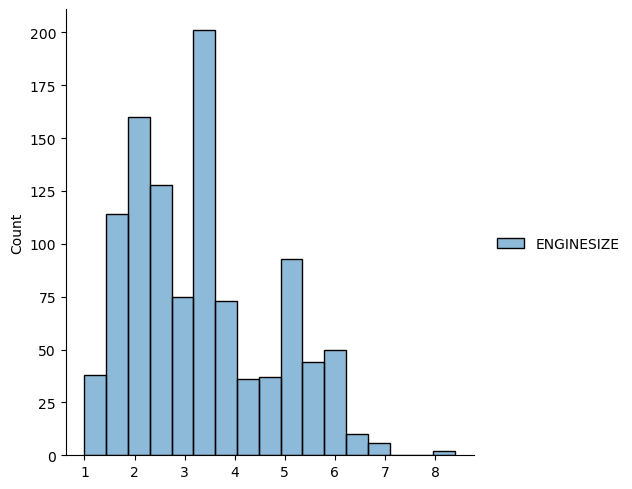

In [40]:
sns.displot(df[['ENGINESIZE']])
plt.show()

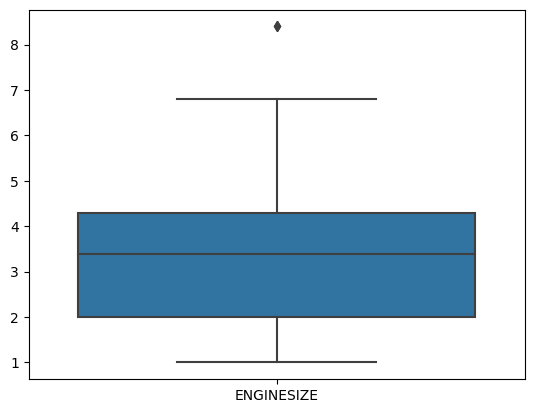

In [41]:
sns.boxplot(data=df[['ENGINESIZE']])
plt.show()

In [44]:
df.columns.tolist()

['MODELYEAR',
 'MAKE',
 'MODEL',
 'VEHICLECLASS',
 'ENGINESIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUELTYPE',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS']

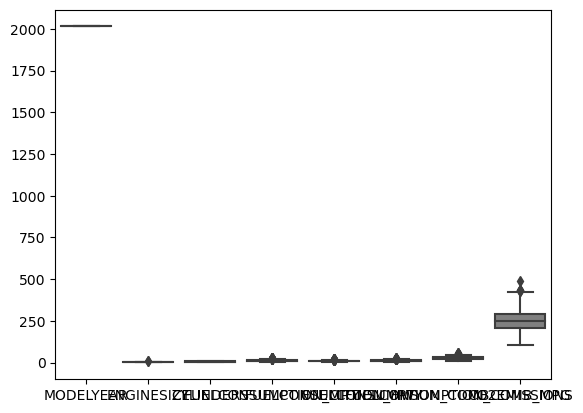

In [46]:
sns.boxplot(data=df[df.columns.tolist()])
plt.show()

In [50]:
#ngoài boxplot viloon or boxenplot dùng cho outliner

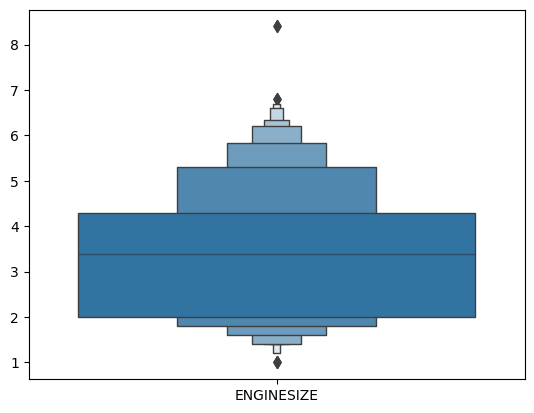

In [56]:
sns.boxenplot(data=df[['ENGINESIZE']],linewidth=True)
plt.show()

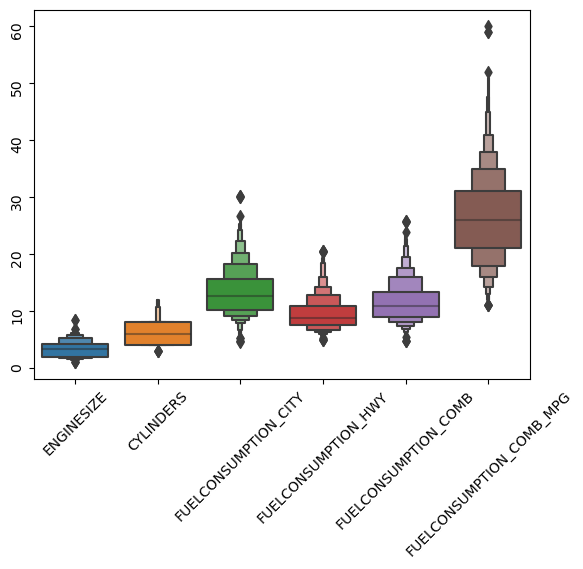

In [64]:
sns.boxenplot(data=df.drop(columns=['MODELYEAR','CO2EMISSIONS']))
plt.xticks(rotation=45)
plt.yticks(rotation=90)
plt.show()

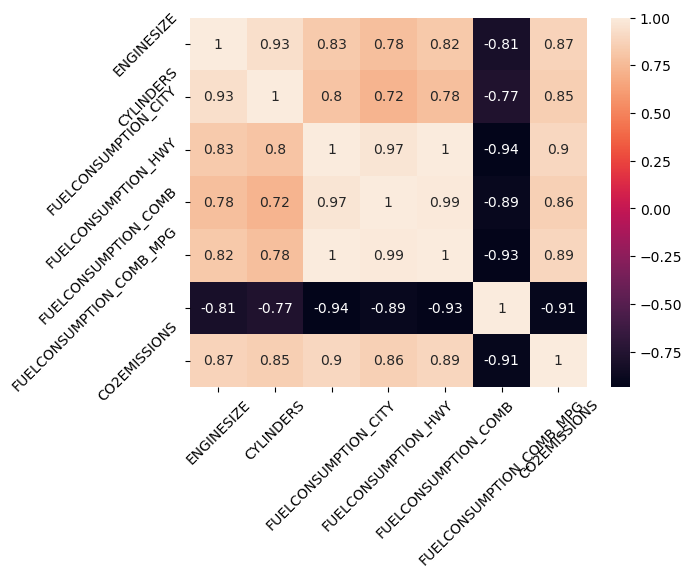

In [74]:
df.corr()
sns.heatmap(df.drop(columns=['MODELYEAR']).corr(),annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [75]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

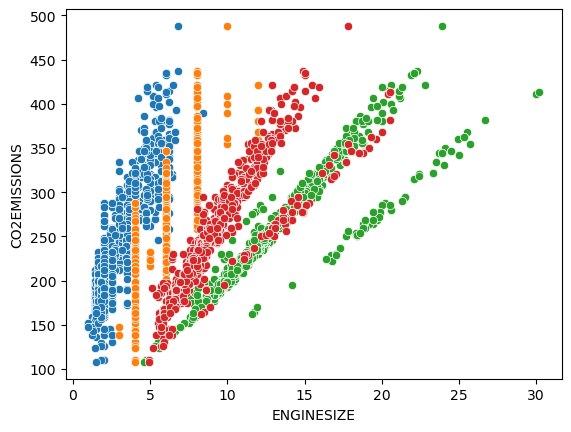

In [92]:
sns.scatterplot(data=df, x='ENGINESIZE',y='CO2EMISSIONS')
sns.scatterplot(data=df, x='CYLINDERS',y='CO2EMISSIONS')
sns.scatterplot(data=df, x='FUELCONSUMPTION_CITY',y='CO2EMISSIONS')
sns.scatterplot(data=df, x='FUELCONSUMPTION_HWY',y='CO2EMISSIONS')
plt.show()

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,recall_score,r2_score
from sklearn.model_selection import train_test_split,KFold

In [119]:
Linear_REG=LinearRegression()

In [120]:
# X,y=(df.drop(columns=['CO2EMISSIONS','FUELCONSUMPTION_COMB']),df.CO2EMISSIONS)

In [123]:
X,y=(df[['ENGINESIZE']],df.CO2EMISSIONS)

In [137]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=28121994)

In [127]:
Linear_REG.fit(x_train,y_train)

LinearRegression()

In [128]:
from sklearn import metrics

In [130]:
Linear_REG.coef_

array([38.95203692])

In [131]:
Linear_REG.intercept_

126.27677766813665

In [144]:
y_pred=Linear_REG.predict(x_test)
y_pred

array([173.01922197, 266.50411057, 184.70483305, 313.24655488,
       243.13288842, 204.1808515 , 204.1808515 , 204.1808515 ,
       204.1808515 , 332.72257334, 262.60890688, 262.60890688,
       289.87533273, 258.71370319, 266.50411057, 204.1808515 ,
       243.13288842, 356.09379549, 188.60003674, 266.50411057,
       309.35135118, 204.1808515 , 180.80962935, 270.39931427,
       219.76166627, 204.1808515 , 204.1808515 , 219.76166627,
       266.50411057, 204.1808515 , 305.45614749, 262.60890688,
       223.65686996, 321.03696226, 367.77940656, 262.60890688,
       196.39044412, 321.03696226, 196.39044412, 243.13288842,
       219.76166627, 204.1808515 , 204.1808515 , 270.39931427,
       266.50411057, 270.39931427, 258.71370319, 204.1808515 ,
       262.60890688, 266.50411057, 266.50411057, 266.50411057,
       282.08492534, 293.77053642, 188.60003674, 313.24655488,
       188.60003674, 266.50411057, 176.91442566, 204.1808515 ,
       223.65686996, 266.50411057, 219.76166627, 266.50

In [145]:
metrics.mean_absolute_error(
    y_test,
    y_pred,
    sample_weight=None,
    multioutput='uniform_average',
)

24.173163996958607

In [154]:
pred1=Linear_REG.predict(x_test)
pred2=Linear_REG.coef_*x_test+ Linear_REG.intercept_

In [160]:
comparision=pd.DataFrame()
comparision['auto']=pred1
comparision['manual']=pred2
comparision

,auto,manual
0,173.019222,NaN
1,266.504111,NaN
2,184.704833,184.704833
3,313.246555,NaN
4,243.132888,262.608907
...,...,...
262,250.923296,332.722573
263,266.504111,332.722573
264,188.600037,NaN
265,321.036962,NaN


In [161]:
metrics.mean_absolute_error(y_test,y_pred)

24.173163996958607

In [163]:
mean_squared_error(y_test,y_pred)

992.9528801445163

In [164]:

metrics.r2_score(
    y_test,
    y_pred,
    sample_weight=None,
    multioutput='uniform_average',
)

0.74579222077756

> MeansqareError
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRM7_WXmdxESf4lTipV95fuHxBCrmmpuxNHAw&usqp=CAU)

> R2 score 
![](https://docs.oracle.com/cd/E36352_01/epm.1112/cb_statistical/images/graphics/r_squared_constant.gif) 

> MEA
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT0Cwq1Yw2hOhQzauqC4Qj1IIvdUPtXEzW5uA&usqp=CAU)

In [167]:
mean_squared_error(y_test,y_pred)
#Càng thấp càng tốt

0.74579222077756

In [171]:
mean_absolute_error(y_test,y_pred)
#càng cao càng tốt

24.173163996958607

In [172]:
r2_score(y_test,y_pred)

0.74579222077756

In [175]:
#GridSerch and RandomSearch-->Turning parameter
#ModelSelection, RSE ->Tunning feature 